In [1]:
# !mkdir models
# !pip install -q numpy opencv-python matplotlib tensorflow

# !bash ./load_models.sh
# !wget --quiet https://upload.wikimedia.org/wikipedia/commons/9/99/JPEG_20190317_010417.jpg -O ./data/test_img.jpg

# 从下面开始运行

In [2]:
from hand_tracker import HandTracker
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
%matplotlib inline
print("hello world")

hello world


In [3]:
palm_model_path = ".\\models\\palm_detection.tflite"
landmark_model_path = ".\\models\\hand_landmark.tflite"
anchors_path = ".\\data\\anchors.csv" 

In [4]:
img = cv2.imread('D:\\jester\\data\\6547\\00017.jpg')[:,:,::-1]

In [5]:
# print(img)

In [6]:
# box_shift determines 
from hand_tracker import HandTracker
detector = HandTracker(palm_model_path, landmark_model_path, anchors_path,
                       box_shift=0.2, box_enlarge=1.3)

hand tracker built ok


C:\Users\zys98\Desktop\graduation\github-repo\gg_handtracking\python-handtracking\hand_tracker.py:96: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x) )


[[51.53941389 64.66724568]
 [61.566634   56.08055834]
 [64.22042907 46.50785202]
 [56.92957462 39.11593414]
 [49.79180254 32.04722944]
 [68.52609653 31.93982507]
 [70.05838164 18.40949958]
 [70.03518447 11.03960078]
 [71.12874182  6.10703518]
 [58.48154067 29.14922656]
 [58.57177493 13.73443753]
 [58.55016526  5.88078709]
 [59.84475493  1.22612302]
 [49.48171376 29.69400608]
 [47.70561107 23.3552493 ]
 [49.16343262 33.43359875]
 [50.93996948 40.19923427]
 [42.57379665 32.75474622]
 [43.21753911 29.3058525 ]
 [45.40238497 37.76286012]
 [47.35914089 45.09823944]]


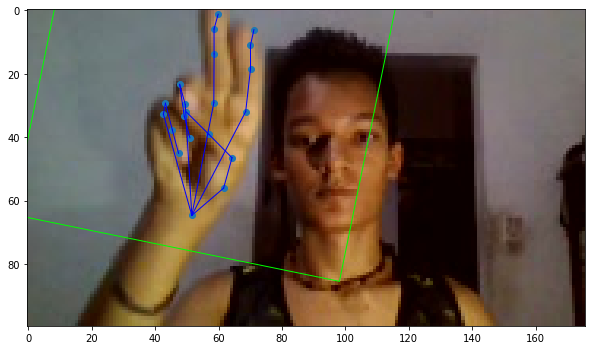

In [7]:
kp, box = detector(img)
print(kp)
f,ax = plt.subplots(1,1, figsize=(10, 10))

ax.imshow(img)

ax.scatter(kp[:,0], kp[:,1])
from matplotlib.lines import Line2D
# 加线条
for finger_index in range(5):
    start = finger_index * 4 + 1
    ax.add_line(Line2D((kp[0][0],kp[start][0]), (kp[0][1],kp[start][1]), linewidth=1, color='blue'))
    for k in range(start, start+3):
        ax.add_line(Line2D((kp[k][0],kp[k+1][0]), (kp[k][1],kp[k+1][1]), linewidth=1, color='blue'))

ax.add_patch(Polygon(box, color="#00ff00", fill=False))

In [19]:
print(f, ax)

Figure(720x720) AxesSubplot(0.125,0.28233;0.775x0.440341)


In [48]:
f.canvas.draw()
data = np.fromstring(f.canvas.tostring_rgb(), dtype=np.uint8) 
data = data.reshape(f.canvas.get_width_height()[::-1] + (3,)) 

C:\Users\zys98\Anaconda3\envs\ht-1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [49]:
cv2.imwrite("end.png", data)

True